<a href="https://colab.research.google.com/github/IamLucifer0312/Furniture-Recognition-CNN/blob/main/TT_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the Furniture dataset, there are 06 categories: beds  - 6578 images; chairs  - 22053 images;
dressers - 7871 images; lamps  - 32402 images; sofas  - 4080 images; tables - 17100 images,
with total of 90084 images. For every category, there are 17 interior styles:
(a) Asian; (b) Beach; (c) Contemp; (d) Craftsman; (e) Eclectic; (f) Farmhouse; (g) Industrial
(h) Media; (i) Midcentury; (j) Modern; (k) Rustic; (l) Scandinavian; (m) Southwestern
(n) Traditional; (o) Transitional; (p) Tropical and (q) Victorian

### Task 3: The extension of the model in Task 2, the recommended furniture items must be in the same interior styles with the style of the input images. In order to fulfill this task, you are required to build a model to recognize the style of a furniture item.

### First, mount the Google Drive to start downloading necessary files


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Now download and extract the original dataset

In [ ]:
import gdown

# Google Drive file ID (from the shared link)
file_id = "1h2SIWZZUESO6xygzF4iMkK-tVc4mZ27M"
file_name = "Furniture_Data.zip"
file_path = "/content/" + file_name

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)
print(f"Downloaded: {file_path}")


Downloading...
From (original): https://drive.google.com/uc?id=1h2SIWZZUESO6xygzF4iMkK-tVc4mZ27M
From (redirected): https://drive.google.com/uc?id=1h2SIWZZUESO6xygzF4iMkK-tVc4mZ27M&confirm=t&uuid=9ccfebbc-05e9-4937-a046-2c3c4be8fecd
To: /content/Furniture_Data.zip
100%|██████████| 2.49G/2.49G [00:24<00:00, 102MB/s] 

Downloaded: /content/Furniture_Data.zip


In [ ]:
!unzip -q $file_path -d /content/extracted_folder

### Define the categories


In [ ]:
categories = ['beds', 'chairs', 'dressers', 'lamps', 'sofas', 'tables']

### Now we remove all duplicated images in all classes using hash. This reduces the time to convert the dataset to features, and avoid recommending similar images

In [ ]:
import hashlib
from PIL import Image
import cv2
import random
import os

# Define the original dataset path
original_dataset_path = '/content/extracted_folder/Furniture_Data'

# Function to compute image hash
def get_image_hash(image_path):
    """Generate an MD5 hash for an image file."""
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

# Store unique images and duplicates
hashes = {}
deleted_count = 0



# Loop through all categories and subfolders
for category in os.listdir(original_dataset_path):
    category_path = os.path.join(original_dataset_path, category)

    if os.path.isdir(category_path):  # Ensure it's a directory
        for style in os.listdir(category_path):
            style_path = os.path.join(category_path, style)

            if os.path.isdir(style_path):  # Ensure it's a directory
                for image in os.listdir(style_path):
                    img_path = os.path.join(style_path, image)
                    img_hash = get_image_hash(img_path)

                    if img_hash in hashes:
                        os.remove(img_path)  # Delete duplicate image
                        deleted_count += 1
                        print(f"Deleted: {img_path}")
                    else:
                        hashes[img_hash] = img_path  # Store first occurrence


# Report results
print(f"\n Removed {deleted_count} duplicate images.")

Deleted: /content/extracted_folder/Furniture_Data/sofas/Transitional/2418transitional-sofas.jpg
Deleted: /content/extracted_folder/Furniture_Data/lamps/Victorian/20886victorian-table-lamps.jpg
Deleted: /content/extracted_folder/Furniture_Data/lamps/Victorian/29042victorian-table-lamps.jpg
Deleted: /content/extracted_folder/Furniture_Data/lamps/Victorian/28991victorian-table-lamps.jpg
Deleted: /content/extracted_folder/Furniture_Data/lamps/Victorian/21480victorian-table-lamps.jpg
Deleted: /content/extracted_folder/Furniture_Data/lamps/Victorian/20879victorian-table-lamps.jpg
Deleted: /content/extracted_folder/Furniture_Data/lamps/Victorian/14835victorian-table-lamps.jpg
Deleted: /content/extracted_folder/Furniture_Data/lamps/Victorian/29052victorian-table-lamps.jpg
Deleted: /content/extracted_folder/Furniture_Data/lamps/Victorian/17451victorian-table-lamps.jpg
Deleted: /content/extracted_folder/Furniture_Data/lamps/Victorian/17444victorian-table-lamps.jpg
Deleted: /content/extracted_fol

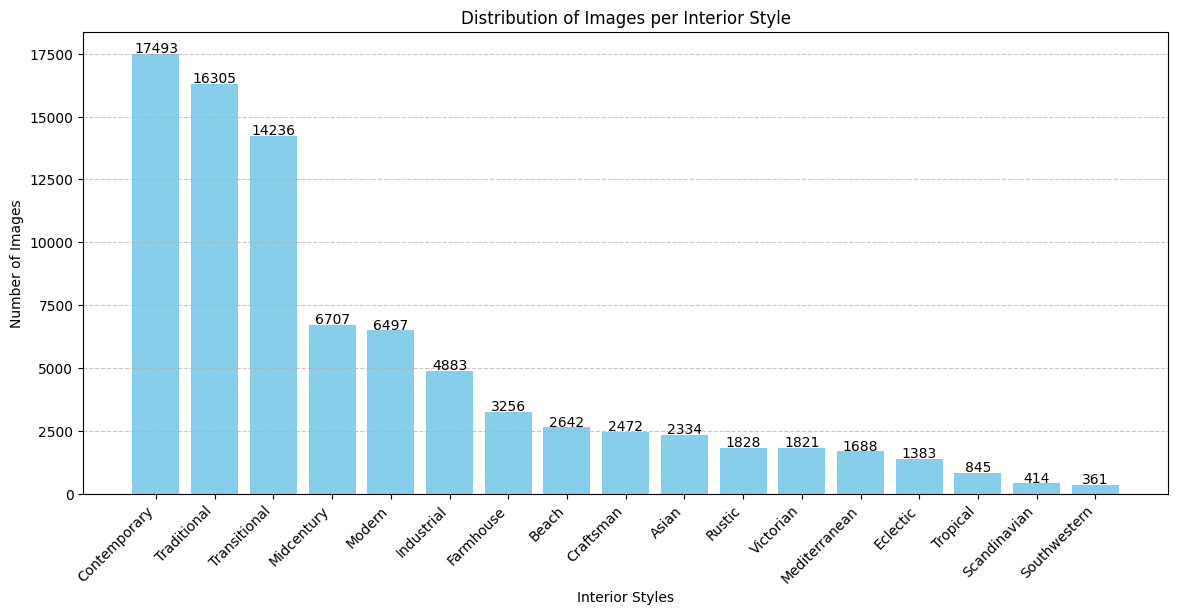

In [ ]:
import os
import matplotlib.pyplot as plt

data_dir = "/content/extracted_folder/Furniture_Data"

style_counts = {}
for category in os.listdir(data_dir):
    if category.startswith("."):
        continue
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
      for style in os.listdir(category_path):
          if style.startswith("."):
              continue
          style_path = os.path.join(category_path, style)
          if os.path.isdir(style_path):
              old_count = style_counts[style] if style in style_counts else 0
              style_counts[style] = old_count + len(os.listdir(style_path))

style_counts = dict(sorted(style_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(14, 6))
plt.bar(style_counts.keys(), style_counts.values(), color='skyblue')
plt.xlabel("Interior Styles")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Interior Style")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(style_counts.values()):
    plt.text(i, v + 50, str(v), ha='center', fontsize=10)

plt.show()

### Define the style categories

In [ ]:
style_categories = ['Transitional',
 'Industrial',
 'Mediterranean',
 'Tropical',
 'Contemporary',
 'Farmhouse',
 'Scandinavian',
 'Craftsman',
 'Beach',
 'Rustic',
 'Victorian',
 'Modern',
 'Southwestern',
 'Asian',
 'Traditional',
 'Midcentury',
 'Eclectic']


In [ ]:
data = []
for category in os.listdir(data_dir):
    if category.startswith("."):
        continue
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
      for style in os.listdir(category_path):
          if style.startswith("."):
              continue
          style_path = os.path.join(category_path, style)
          if os.path.isdir(style_path):
              for image in os.listdir(style_path):
                  image_dict = {}
                  image_path = os.path.join(style_path, image)
                  image_dict['path'] = image_path
                  image_dict['category'] = category
                  image_dict['style'] = style
                  data.append(image_dict)

data


[{'path': '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/4207scandinavian-sofas.jpg',
  'category': 'sofas',
  'style': 'Scandinavian'},
 {'path': '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/4213scandinavian-sofas.jpg',
  'category': 'sofas',
  'style': 'Scandinavian'},
 {'path': '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/1549scandinavian-sofas.jpg',
  'category': 'sofas',
  'style': 'Scandinavian'},
 {'path': '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/2603scandinavian-sofas.jpg',
  'category': 'sofas',
  'style': 'Scandinavian'},
 {'path': '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/4212scandinavian-sofas.jpg',
  'category': 'sofas',
  'style': 'Scandinavian'},
 {'path': '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/4154scandinavian-sofas.jpg',
  'category': 'sofas',
  'style': 'Scandinavian'},
 {'path': '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/2235scandinavian-sofas.

In [ ]:
style_dict = {}
for item in data:
    style = item['style']
    category = item['category']
    img_path = item['path']
    if style not in style_dict:
        style_dict[style] = {}
    if category not in style_dict[style]:
        style_dict[style][category] = []
    style_dict[style][category].append(img_path)

for style, cat_dict in style_dict.items():
    print(f"Style: {style}")
    for cat, paths in cat_dict.items():
        print(f"  {cat}: {len(paths)} images")

Style: Scandinavian
  sofas: 15 images
  lamps: 94 images
  tables: 45 images
  dressers: 11 images
  chairs: 216 images
  beds: 33 images
Style: Victorian
  sofas: 66 images
  lamps: 1275 images
  tables: 46 images
  dressers: 133 images
  chairs: 218 images
  beds: 83 images
Style: Eclectic
  sofas: 13 images
  lamps: 697 images
  tables: 410 images
  dressers: 40 images
  chairs: 201 images
  beds: 22 images
Style: Craftsman
  sofas: 13 images
  lamps: 1539 images
  tables: 409 images
  dressers: 126 images
  chairs: 198 images
  beds: 187 images
Style: Industrial
  sofas: 17 images
  lamps: 1423 images
  tables: 2661 images
  dressers: 212 images
  chairs: 509 images
  beds: 61 images
Style: Rustic
  sofas: 15 images
  lamps: 823 images
  tables: 71 images
  dressers: 378 images
  chairs: 303 images
  beds: 238 images
Style: Contemporary
  sofas: 1240 images
  lamps: 5241 images
  tables: 3177 images
  dressers: 1284 images
  chairs: 4600 images
  beds: 1951 images
Style: Transitio

In [ ]:
import random
from itertools import combinations

def generate_positive_pairs(style_dict, samples_per_style=1000):
    positive_pairs = []  # List to store tuples: (img_path1, img_path2, label)

    # Iterate over each style group
    for style, cat_dict in style_dict.items():
        # Get the list of categories available for this style
        categories = list(cat_dict.keys())
        if len(categories) < 2:
            # We need at least 2 different categories to form a pair.
            continue

        # List to accumulate all possible positive pairs for this style
        style_pairs = []
        # For every pair of different categories, generate all possible image pairs
        for cat1, cat2 in combinations(categories, 2):
            imgs_cat1 = cat_dict[cat1]
            imgs_cat2 = cat_dict[cat2]
            for img1 in imgs_cat1:
                for img2 in imgs_cat2:
                    style_pairs.append((img1, img2, 1))  # label 1 for positive pairs

        # If there are more pairs than desired, randomly sample a fixed number.
        if len(style_pairs) > samples_per_style:
            style_pairs = random.sample(style_pairs, samples_per_style)

        positive_pairs.extend(style_pairs)

    return positive_pairs

# Example usage:
positive_pairs = generate_positive_pairs(style_dict, samples_per_style=7000)
print("Total positive pairs generated:", len(positive_pairs))


Total positive pairs generated: 119000


In [ ]:
def generate_negative_pairs(style_dict, num_pairs):
    negative_pairs = []

    # Build a list of (img_path, style) for all images
    all_images = []
    for style, cat_dict in style_dict.items():
        for cat, images in cat_dict.items():
            for img in images:
                all_images.append((img, style))

    # Randomly sample negative pairs until we have num_pairs
    while len(negative_pairs) < num_pairs:
        img1, style1 = random.choice(all_images)
        img2, style2 = random.choice(all_images)
        if style1 != style2:  # Only form a negative pair if styles differ.
            negative_pairs.append((img1, img2, 0))  # Label 0 for negative pairs

    return negative_pairs

# Set the desired ratio: 1 positive : 16 negatives
num_negatives_needed = 16 * len(positive_pairs)
negative_pairs = generate_negative_pairs(style_dict, num_pairs=num_negatives_needed)
print("Total negative pairs generated:", len(negative_pairs))


Total negative pairs generated: 1904000


In [ ]:
import random
from sklearn.model_selection import train_test_split

# Combine both sets and shuffle
all_pairs = positive_pairs + negative_pairs
random.shuffle(all_pairs)



In [ ]:
print(len(all_pairs))

2023000


In [ ]:
from sklearn.model_selection import train_test_split

# Suppose training_pairs is a list of tuples (img1_path, img2_path, label)
# where label is 1 for positive pairs and 0 for negative pairs.

# Extract labels from your training_pairs
all_labels = [pair[2] for pair in all_pairs]

# Perform stratified splitting
train_pairs, val_test_pairs = train_test_split(
    all_pairs,
    test_size=0.3,
    random_state=42,
    stratify=all_labels
)

val_pairs, test_pairs = train_test_split(
    val_test_pairs,
    test_size=0.5,
    random_state=42,
    stratify=[pair[2] for pair in val_test_pairs]
)

print("Number of training pairs:", len(train_pairs))
print("Number of validation pairs:", len(val_pairs))
print("Number of testing pairs:", len(test_pairs))

# Optionally, check the ratio in each split:
train_labels = [pair[2] for pair in train_pairs]
val_labels = [pair[2] for pair in val_pairs]
test_labels = [pair[2] for pair in test_pairs]

print("Training set positive ratio:", train_labels.count(1) / len(train_labels))
print("Testing set positive ratio:", test_labels.count(1) / len(test_labels))
print("Testing set positive ratio:", test_labels.count(1) / len(test_labels))


Number of training pairs: 1416100
Number of validation pairs: 303450
Number of testing pairs: 303450
Training set positive ratio: 0.058823529411764705
Testing set positive ratio: 0.058823529411764705
Testing set positive ratio: 0.058823529411764705


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_and_preprocess(img_path, target_size=(224,224)):
    """
    Loads an image, resizes it to target_size, converts to array, and normalizes pixel values to [0, 1].
    """
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    return img_array


In [ ]:
import tensorflow as tf
class SiameseDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, pairs, batch_size=32, target_size=(224,224), shuffle=True):
        self.pairs = pairs
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.pairs) / self.batch_size))

    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.pairs)

    def __getitem__(self, index):
        batch_pairs = self.pairs[index*self.batch_size:(index+1)*self.batch_size]
        batch_img1 = []
        batch_img2 = []
        batch_labels = []
        for img1_path, img2_path, label in batch_pairs:
            batch_img1.append(load_and_preprocess(img1_path, self.target_size))
            batch_img2.append(load_and_preprocess(img2_path, self.target_size))
            batch_labels.append(label)
        return (np.array(batch_img1), np.array(batch_img2)), np.array(batch_labels)


# Create the generator
train_generator = SiameseDataGenerator(train_pairs, batch_size=32, target_size=(224,224), shuffle=True)
val_generator = SiameseDataGenerator(val_pairs, batch_size=32, target_size=(224,224), shuffle=False)
test_generator = SiameseDataGenerator(test_pairs, batch_size=32, target_size=(224,224), shuffle=False)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import concatenate


def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4):
  path1= Conv2D(filters=f1, kernel_size=(1,1), padding='same', activation='relu')(input_layer)

  path2 = Conv2D(filters=f2_conv1, kernel_size=(1,1), padding='same', activation='relu')(input_layer)
  path2 = Conv2D(filters=f2_conv3, kernel_size=(3,3), padding='same', activation='relu')(path2)

  path3 = Conv2D(filters=f3_conv1, kernel_size=(1,1), padding='same', activation='relu')(input_layer)
  path3 = Conv2D(filters=f3_conv5, kernel_size=(5,5), padding='same', activation='relu')(path3)

  path4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_layer)
  path4 = Conv2D(filters=f4, kernel_size=(1,1), padding='same', activation='relu')(path4)

  output = concatenate([path1, path2, path3, path4], axis=-1)
  return output

In [ ]:
def GoogleNet():
  input_layer = Input(shape=(224,224,3))
  x = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='same', activation='relu')(input_layer)
  x = MaxPooling2D((3,3), strides=2, padding='same')(x)
  x = Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu')(x)
  x = MaxPooling2D((3,3), strides=2, padding='same')(x)

  # Inception 3a - 3b
  x = Inception_block(x, f1=64, f2_conv1=96, f2_conv3=128, f3_conv1=16, f3_conv5=32, f4=32)
  x = Inception_block(x, f1=128, f2_conv1=128, f2_conv3=192, f3_conv1=32, f3_conv5=96, f4=64)
  x = MaxPooling2D((3,3), strides=2, padding='same')(x)

  # Inception 4a - 4b - 4c
  x = Inception_block(x, f1=192, f2_conv1=96, f2_conv3=208, f3_conv1=16, f3_conv5=48, f4=64)
  x = Inception_block(x, f1=160, f2_conv1=112, f2_conv3=224, f3_conv1=24, f3_conv5=64, f4=64)
  x = Inception_block(x, f1=128, f2_conv1=128, f2_conv3=256, f3_conv1=24, f3_conv5=64, f4=64)

  # Average pooling that produces a 512-dimensional vector
  x = AveragePooling2D((7,7), strides=1, padding='valid')(x)
  x = Flatten()(x)
  x = Dense(1024, activation='relu')(x)
  x = Dropout(0.4)(x)
  embedding_layer = Dense(256, activation='relu', name='embedding')(x)

  model = Model(inputs=input_layer, outputs=embedding_layer, name='GoogleNet')
  return model



In [ ]:
# Create the base embedding model
embedding_model = GoogleNet()
embedding_model.summary()

Model: "GoogleNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_40 (Conv2D)        │ (None, 112, 112, 64)   │          9,472 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_11          │ (None, 56, 56, 64)     │              0 │ conv2d_40[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_41 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ max_pooling2d_11[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_12          │ (None, 28, 28, 64)     │              0 │ conv2d_41[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_43 (Conv2D)        │ (None, 28, 28, 96)     │          6,240 │ max_pooling2d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_45 (Conv2D)        │ (None, 28, 28, 16)     │          1,040 │ max_pooling2d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_13          │ (None, 28, 28, 64)     │              0 │ max_pooling2d_12[0][0] │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_42 (Conv2D)        │ (None, 28, 28, 64)     │          4,160 │ max_pooling2d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_44 (Conv2D)        │ (None, 28, 28, 128)    │        110,720 │ conv2d_43[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_46 (Conv2D)        │ (None, 28, 28, 32)     │         12,832 │ conv2d_45[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_47 (Conv2D)        │ (None, 28, 28, 32)     │          2,080 │ max_pooling2d_13[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 28, 28, 256)    │              0 │ conv2d_42[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_44[0][0],       │
│                           │                        │                │ conv2d_46[0][0],       │
│                           │                        │                │ conv2d_47[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_49 (Conv2D)        │ (None, 28, 28, 128)    │         32,896 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_51 (Conv2D)        │ (None, 28, 28, 32)     │          8,224 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_14          │ (None, 28, 28, 256)    │              0 │ concatenate_5[0][0]    │
│ (MaxPooling2D)       

 Total params: 35,725,504 (136.28 MB)

 Trainable params: 35,725,504 (136.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define a simple Euclidean distance function
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

# Siamese inputs
input_a = Input(shape=(224,224,3))
input_b = Input(shape=(224,224,3))

# Generate embeddings for both inputs
embedding_a = embedding_model(input_a)
embedding_b = embedding_model(input_b)

# Compute distance
distance = Lambda(euclidean_distance, name='distance')([embedding_a, embedding_b])

# Siamese model: takes two images and outputs their distance
siamese_model = Model(inputs=[input_a, input_b], outputs=distance)
siamese_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_8             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ GoogleNet (Functional)    │ (None, 256)            │     35,725,504 │ input_layer_7[0][0],   │
│                           │                        │                │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ distance (Lambda)         │ (None, 1)              │              0 │ GoogleNet[0][0],       │
│                           │                        │                │ GoogleNet[1][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 35,725,504 (136.28 MB)

 Trainable params: 35,725,504 (136.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def contrastive_loss(y_true, y_pred):
    margin = 1.0  # Adjust margin as needed
    return K.mean(y_true * K.square(y_pred) +
                  (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))


In [ ]:
# Create a ModelCheckpoint callback.
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='siamese_model_epoch_{epoch:02d}_val_loss_{val_loss:.4f}.h5',
    monitor='val_loss',      # Monitor the validation loss.
    verbose=1,               # Print a message when saving.
    save_best_only=True,     # Save only when val_loss improves.
    save_weights_only=False, # Save the full model (architecture + weights).
    mode='min'               # We want to minimize val_loss.
)

In [ ]:
# Freeze all layers except the embedding layer
for layer in embedding_model.layers:
    if layer.name != 'embedding':
        layer.trainable = False
    else:
        layer.trainable = True

# Compile with a high learning rate (0.01) and (optionally) weight decay if implemented via kernel_regularizer.
optimizer_stage1 = tf.keras.optimizers.Adam(learning_rate=0.01)
siamese_model.compile(loss=contrastive_loss, optimizer=optimizer_stage1)

# Train for 50 iterations (this could be 50 steps; adjust steps_per_epoch accordingly)
# For example, if using a data generator, you might do:
siamese_model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=1,
    validation_data=val_generator,
    validation_steps=10  # adjust based on your validation set size
)

50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 178ms/step - loss: 0.1634 - val_loss: 0.5432


In [ ]:
# Unfreeze all layers for fine-tuning
for layer in embedding_model.layers:
    layer.trainable = True

optimizer_stage2 = tf.keras.optimizers.Adam(learning_rate=0.0001, clipnorm=1.0)
siamese_model.compile(loss=contrastive_loss, optimizer=optimizer_stage2)

# Continue training for the remainder of the epochs.
# Overall training takes eight epochs; if stage 1 took the equivalent of 1 epoch, train for 7 more epochs:
siamese_model.fit(train_generator, epochs=7, validation_data=val_generator, callbacks=[checkpoint_callback])

Epoch 1/7
44254/44254 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0601
Epoch 1: val_loss improved from inf to 0.60441, saving model to siamese_model_epoch_01_val_loss_0.6044.h5


44254/44254 ━━━━━━━━━━━━━━━━━━━━ 4792s 108ms/step - loss: 0.0601 - val_loss: 0.6044
Epoch 2/7
44254/44254 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0569
Epoch 2: val_loss improved from 0.60441 to 0.50586, saving model to siamese_model_epoch_02_val_loss_0.5059.h5


44254/44254 ━━━━━━━━━━━━━━━━━━━━ 5014s 113ms/step - loss: 0.0569 - val_loss: 0.5059
Epoch 3/7
44254/44254 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0551
Epoch 3: val_loss improved from 0.50586 to 0.42277, saving model to siamese_model_epoch_03_val_loss_0.4228.h5


44254/44254 ━━━━━━━━━━━━━━━━━━━━ 4806s 109ms/step - loss: 0.0551 - val_loss: 0.4228
Epoch 4/7
44254/44254 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: nan
Epoch 4: val_loss did not improve from 0.42277
44254/44254 ━━━━━━━━━━━━━━━━━━━━ 4857s 110ms/step - loss: nan - val_loss: nan
Epoch 5/7
44254/44254 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: nan
Epoch 5: val_loss did not improve from 0.42277
44254/44254 ━━━━━━━━━━━━━━━━━━━━ 4836s 109ms/step - loss: nan - val_loss: nan
Epoch 6/7
 2264/44254 ━━━━━━━━━━━━━━━━━━━━ 1:02:40 90ms/step - loss: nan

KeyboardInterrupt: 

In [ ]:
siamese_model.evaluate(test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 406/9483 ━━━━━━━━━━━━━━━━━━━━ 16:21 108ms/step - loss: nan

KeyboardInterrupt: 

In [ ]:
import keras

import tensorflow as tf
from tensorflow.keras import backend as K

# Define a simple Euclidean distance function
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

# Register the custom function with Keras
@keras.saving.register_keras_serializable()
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

# Define the contrastive loss function
def contrastive_loss(y_true, y_pred):
    margin = 1.0  # Adjust margin as needed
    return K.mean(y_true * K.square(y_pred) +
                  (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

# Register the custom function with Keras
@keras.saving.register_keras_serializable()
def contrastive_loss(y_true, y_pred):
    margin = 1.0  # Adjust margin as needed
    return K.mean(y_true * K.square(y_pred) +
                  (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))


best_model = keras.saving.load_model("/content/siamese_model_epoch_03_val_loss_0.4228.h5",
                                   custom_objects={'euclidean_distance': euclidean_distance,
                                                   'contrastive_loss': contrastive_loss})  # Provide custom_objects

best_model.evaluate(test_generator)

9483/9483 ━━━━━━━━━━━━━━━━━━━━ 852s 90ms/step - loss: 0.4231


0.42336803674697876

In [ ]:
img1 = load_and_preprocess("/content/extracted_folder/Furniture_Data/beds/Asian/7593asian-daybeds.jpg", target_size=(224,224))
img2 = load_and_preprocess("/content/extracted_folder/Furniture_Data/beds/Asian/19726asian-daybeds.jpg", target_size=(224,224))

# Expand dimensions to create a batch of size 1.
img1_batch = np.expand_dims(img1, axis=0)
img2_batch = np.expand_dims(img2, axis=0)

# Use your loaded model (best_model) to predict the distance.
distance = best_model.predict([img1_batch, img2_batch])
print("Predicted distance between images:", distance)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted distance between images: [[0.38957965]]


In [ ]:
from google.colab import files
files.download('/content/siamese_model_epoch_03_val_loss_0.4228.h5')  # Downloads the model to your local device


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
embedding_extractor = best_model.get_layer("GoogleNet")
embedding_extractor.summary()

Model: "GoogleNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_40 (Conv2D)        │ (None, 112, 112, 64)   │          9,472 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_11          │ (None, 56, 56, 64)     │              0 │ conv2d_40[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_41 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ max_pooling2d_11[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_12          │ (None, 28, 28, 64)     │              0 │ conv2d_41[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_43 (Conv2D)        │ (None, 28, 28, 96)     │          6,240 │ max_pooling2d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_45 (Conv2D)        │ (None, 28, 28, 16)     │          1,040 │ max_pooling2d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_13          │ (None, 28, 28, 64)     │              0 │ max_pooling2d_12[0][0] │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_42 (Conv2D)        │ (None, 28, 28, 64)     │          4,160 │ max_pooling2d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_44 (Conv2D)        │ (None, 28, 28, 128)    │        110,720 │ conv2d_43[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_46 (Conv2D)        │ (None, 28, 28, 32)     │         12,832 │ conv2d_45[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_47 (Conv2D)        │ (None, 28, 28, 32)     │          2,080 │ max_pooling2d_13[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 28, 28, 256)    │              0 │ conv2d_42[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_44[0][0],       │
│                           │                        │                │ conv2d_46[0][0],       │
│                           │                        │                │ conv2d_47[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_49 (Conv2D)        │ (None, 28, 28, 128)    │         32,896 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_51 (Conv2D)        │ (None, 28, 28, 32)     │          8,224 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_14          │ (None, 28, 28, 256)    │              0 │ concatenate_5[0][0]    │
│ (MaxPooling2D)       

 Total params: 35,725,504 (136.28 MB)

 Trainable params: 35,725,504 (136.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def get_embedding(img_path, target_size=(224,224)):
    img = load_and_preprocess(img_path, target_size)  # Your function that loads and preprocesses the image.
    img_batch = np.expand_dims(img, axis=0)
    embedding = embedding_extractor.predict(img_batch, verbose=0)
    return embedding.squeeze()

In [ ]:
embeddings = []
for i, item in enumerate(data):
    img_path = item['path']
    emb = get_embedding(img_path, target_size=(224,224))
    embeddings.append(emb)

    # Print progress every 1000 images
    if (i + 1) % 1000 == 0:
        print(f"Processed {i + 1} images")

# Optionally, convert the embeddings list to a NumPy array
embeddings_array = np.array(embeddings)

# Save the embeddings to a .npy file
np.save("embeddings.npy", embeddings_array)
print("Embeddings array shape:", embeddings_array.shape)


Processed 1000 images
Processed 2000 images
Processed 3000 images
Processed 4000 images
Processed 5000 images
Processed 6000 images
Processed 7000 images
Processed 8000 images
Processed 9000 images
Processed 10000 images
Processed 11000 images
Processed 12000 images
Processed 13000 images
Processed 14000 images
Processed 15000 images
Processed 16000 images
Processed 17000 images
Processed 18000 images
Processed 19000 images
Processed 20000 images
Processed 21000 images
Processed 22000 images
Processed 23000 images
Processed 24000 images
Processed 25000 images
Processed 26000 images
Processed 27000 images
Processed 28000 images
Processed 29000 images
Processed 30000 images
Processed 31000 images
Processed 32000 images
Processed 33000 images
Processed 34000 images
Processed 35000 images
Processed 36000 images
Processed 37000 images
Processed 38000 images
Processed 39000 images
Processed 40000 images
Processed 41000 images
Processed 42000 images
Processed 43000 images
Processed 44000 imag

In [ ]:

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

distance_layer = best_model.get_layer("distance")
# Suppose your embeddings have shape (embedding_dim,) - for instance, 256.
embedding_dim = embeddings_array.shape[1]  # e.g., 256

# Define two input layers for the embeddings.
input1 = Input(shape=(embedding_dim,))
input2 = Input(shape=(embedding_dim,))

# Get the distance output using your Lambda layer from the Siamese model.
# This is equivalent to calling the Lambda function.
distance_output = distance_layer([input1, input2])

# Create a model that takes the two embeddings and outputs the computed distance.
distance_model = Model(inputs=[input1, input2], outputs=distance_output)

print(distance_model.summary())


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 256)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_12            │ (None, 256)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ distance (Lambda)         │ (None, 1)              │              0 │ input_layer_11[0][0],  │
│                           │                        │                │ input_layer_12[0][0]   │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
image_paths = []
for i, item in enumerate(data):
    img_path = item['path']
    image_paths.append(img_path)

image_paths

['/content/extracted_folder/Furniture_Data/sofas/Scandinavian/4207scandinavian-sofas.jpg',
 '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/4213scandinavian-sofas.jpg',
 '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/1549scandinavian-sofas.jpg',
 '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/2603scandinavian-sofas.jpg',
 '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/4212scandinavian-sofas.jpg',
 '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/4154scandinavian-sofas.jpg',
 '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/2235scandinavian-sofas.jpg',
 '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/4209scandinavian-sofas.jpg',
 '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/2236scandinavian-sofas.jpg',
 '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/4215scandinavian-sofas.jpg',
 '/content/extracted_folder/Furniture_Data/sofas/Scandinavian/4210scandinavian-sofas.jpg',

In [119]:
def recommend_similar_images(query_image_path, dataset_embeddings, image_paths, top_k=10):
    # Get the query image's embedding.
    query_embedding = get_embedding(query_image_path, target_size=(224,224))

    # Compute Euclidean distances between query_embedding and all dataset embeddings.
    distances = distance_model.predict([
        np.tile(query_embedding, (dataset_embeddings.shape[0], 1)),
        dataset_embeddings
    ])

    # Flatten distances if they come out as a column vector.
    distances = distances.flatten()

    # Get indices of the top_k smallest distances.
    top_indices = np.argsort(distances)[:top_k]

    # Retrieve the recommended paths using these indices.
    recommended_paths = [image_paths[int(i)] for i in top_indices]

    return recommended_paths, distances[top_indices], top_indices


query_image_path = "/content/Screenshot 2025-02-24 052917.png"
recommended_paths, rec_distances, rec_indices = recommend_similar_images(query_image_path, embeddings_array, image_paths, top_k=10)

print("Top 10 recommended images (and indices):")
responses = []
for path, dist, idx in zip(recommended_paths, rec_distances, rec_indices):
    print(f"Index {idx}: {path} (distance: {float(dist):.4f})")
    responses.append(path)

2662/2662 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Top 10 recommended images (and indices):
Index 2847: /content/extracted_folder/Furniture_Data/sofas/Traditional/3189traditional-sofas.jpg (distance: 0.0527)
Index 44395: /content/extracted_folder/Furniture_Data/tables/Farmhouse/31206farmhouse-console-tables.jpg (distance: 0.0541)
Index 68039: /content/extracted_folder/Furniture_Data/chairs/Mediterranean/42553mediterranean-footstools-and-ottomans.jpg (distance: 0.0553)
Index 52348: /content/extracted_folder/Furniture_Data/dressers/Transitional/2873transitional-dressers.jpg (distance: 0.0559)
Index 55220: /content/extracted_folder/Furniture_Data/dressers/Farmhouse/34519farmhouse-buffets-and-sideboards.jpg (distance: 0.0566)
Index 51589: /content/extracted_folder/Furniture_Data/dressers/Transitional/2297transitional-dressers.jpg (distance: 0.0577)
Index 3021: /content/extracted_folder/Furniture_Data/sofas/Traditional/2972traditional-sofas.jpg (distance: 0.0598)
Index 39326: /content/extracted_fol

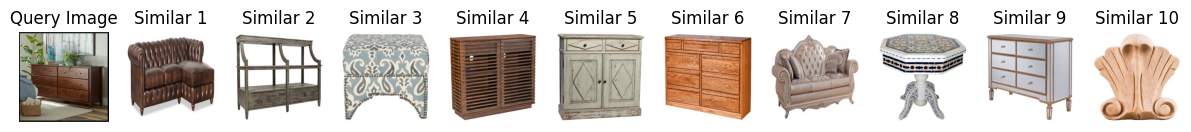

In [120]:
import matplotlib.pyplot as plt
from PIL import Image

num_images = len(responses) + 1  # +1 for the query image
plt.figure(figsize=(15, 5))

# Plot the query image
plt.subplot(1, num_images, 1)
plt.imshow(Image.open(query_image_path))
plt.axis("off")
plt.title("Query Image")

# Plot similar images
for i, img_path in enumerate(responses, start=2):
    plt.subplot(1, num_images, i)
    plt.imshow(Image.open(img_path))
    plt.axis("off")
    plt.title(f"Similar {i-1}")

plt.show()
